In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
train_image_dir = 'D:/Datasets/aptos2019-blindness-detection/train_images/'
test_image_dir = 'D:/Datasets/aptos2019-blindness-detection/test_images/'
train_csv = 'D:/Datasets/aptos2019-blindness-detection/train.csv'
test_csv = 'D:/Datasets/aptos2019-blindness-detection/test.csv'

In [4]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
print(train_df.shape)
print(test_df.shape)
train_df.head(5)

(3662, 2)
(1928, 1)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
train_labels = train_df['diagnosis']
train_id = train_df['id_code']

In [6]:
# 0 - No DR
# 1 - Mild
# 2- Moderate
# 3 - Severe
# 4 - Proliferative DR

train_df['diagnosis'].value_counts().sort_values()

3     193
4     295
1     370
2     999
0    1805
Name: diagnosis, dtype: int64

In [7]:
d = train_df['diagnosis'].value_counts()
d

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

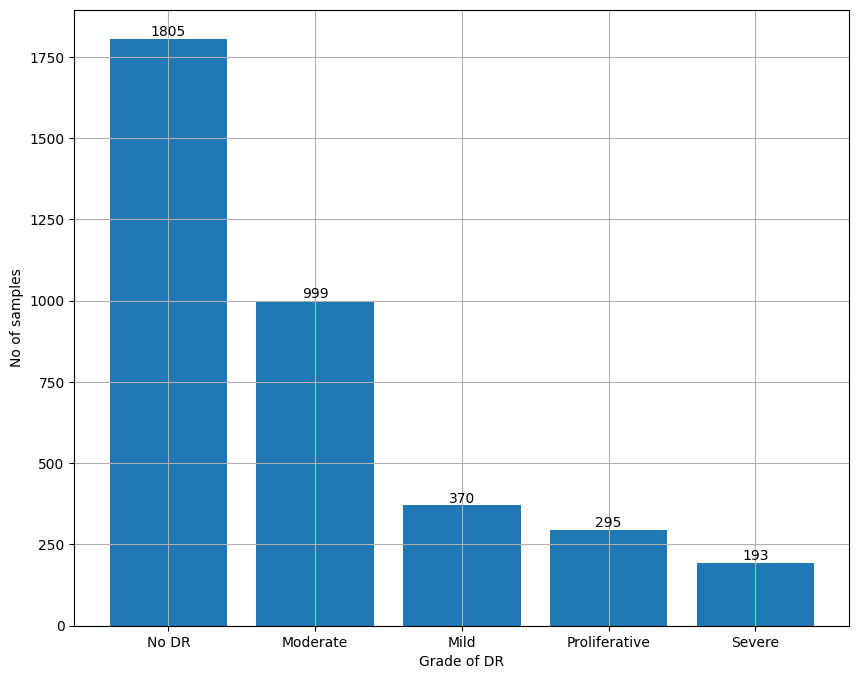

In [8]:
types = ['No DR','Moderate','Mild','Proliferative','Severe']
fig,ax = plt.subplots(figsize = (10,8))
ax.set_xlabel('Grade of DR')
ax.set_ylabel('No of samples')
container = ax.bar(types,d)
ax.bar_label(container)
ax.grid()

Number of target classes: [0, 1, 2, 3, 4]


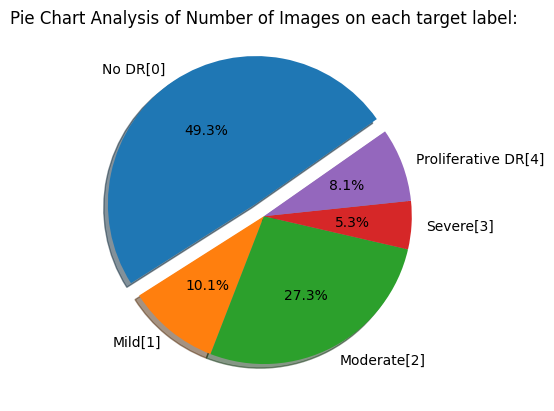

In [9]:
class_labels = {0: 'No DR[0]',1: 'Mild[1]', 2: 'Moderate[2]', 3: 'Severe[3]', 4: 'Proliferative DR[4]'}
class_sizes = []
for i in range(0,5):
    class_sizes.append(list(train_df['diagnosis']).count(i))
class_labels_ = list(set(train_df['diagnosis'])) 
print("Number of target classes: {}".format(class_labels_))
labels = class_labels.values()
colors = ['gold', 'blue','green','yellow','red']
plt.pie(class_sizes,explode = [0.1,0,0,0,0], labels= labels, shadow = True,autopct='%1.1f%%', startangle = 35)
plt.title('Pie Chart Analysis of Number of Images on each target label:')
plt.show()

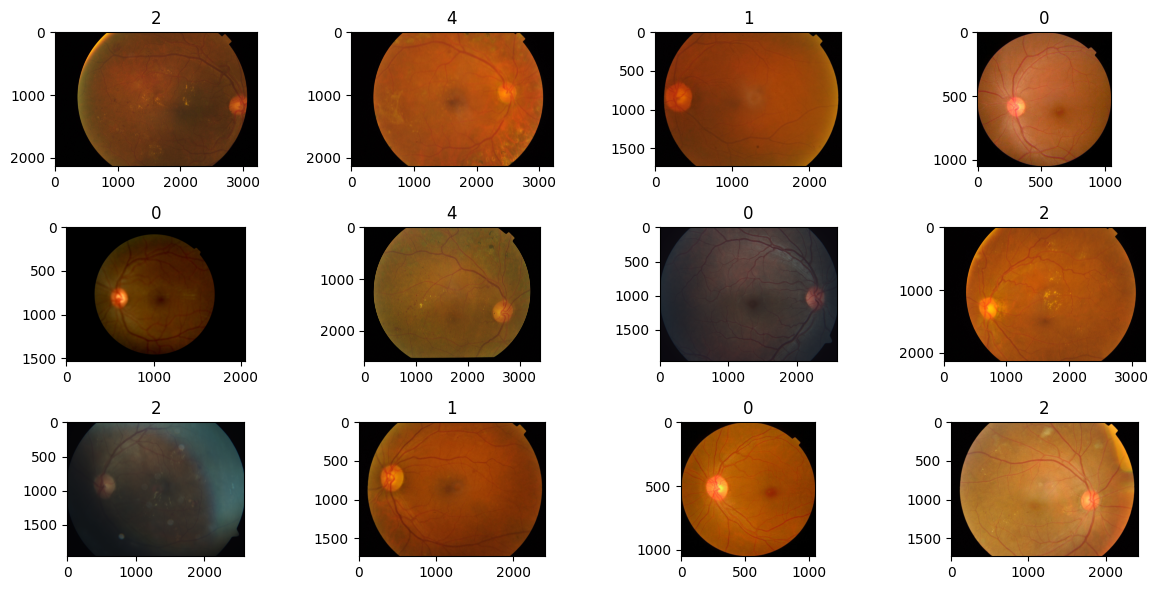

In [10]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(3*columns, 2*rows))
    #print(df)

    for i in range(columns*rows):
        
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        # image_path1 = f'D:/Datasets/aptos2019-blindness-detection/train_images/{image_path}.png'
        img = cv2.imread(f'D:/Datasets/aptos2019-blindness-detection/train_images/{image_path}.png')
        # print(image_path1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()
    cv2.waitKey(0)
    #cv2.destroyAllWindows()

display_samples(train_df)

In [11]:
def image_analysis(dataframe, path):
    width_range = []
    height_range = []
    for i in range(dataframe.shape[0]):
        
        img = cv2.imread(path+dataframe.iloc[i]['id_code']+'.png')
        
        height, width, _ = img.shape
        width_range.append(width)
        height_range.append(height)
    return width_range, height_range
width_range, height_range = image_analysis(train_df, train_image_dir)

In [12]:
avg_width = sum(width_range)/len(width_range)
avg_height = sum(height_range)/len(height_range)
max_width = max(width_range)
max_height = max(height_range)
min_width = min(width_range)
min_height = min(height_range)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print("-"*100)
print("Maximum width of images in training set: {}".format(max_width))
print("Maximum height of images in training set: {}".format(max_height))
print("-"*100)
print("Minimum width of images in training set: {}".format(min_width))
print("Minimum height of images in training set: {}".format(min_height))

Average width of images in training set: 2015
Average height of images in training set: 1526
----------------------------------------------------------------------------------------------------
Maximum width of images in training set: 4288
Maximum height of images in training set: 2848
----------------------------------------------------------------------------------------------------
Minimum width of images in training set: 474
Minimum height of images in training set: 358


C:\Users\User\AppData\Local\Temp\ipykernel_30496\346910710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(width_range, kde = False, label = 'train_width')
C:\Users\User\AppData\Local\Temp\ipykernel_30496\346910710.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(height_range, kde = False

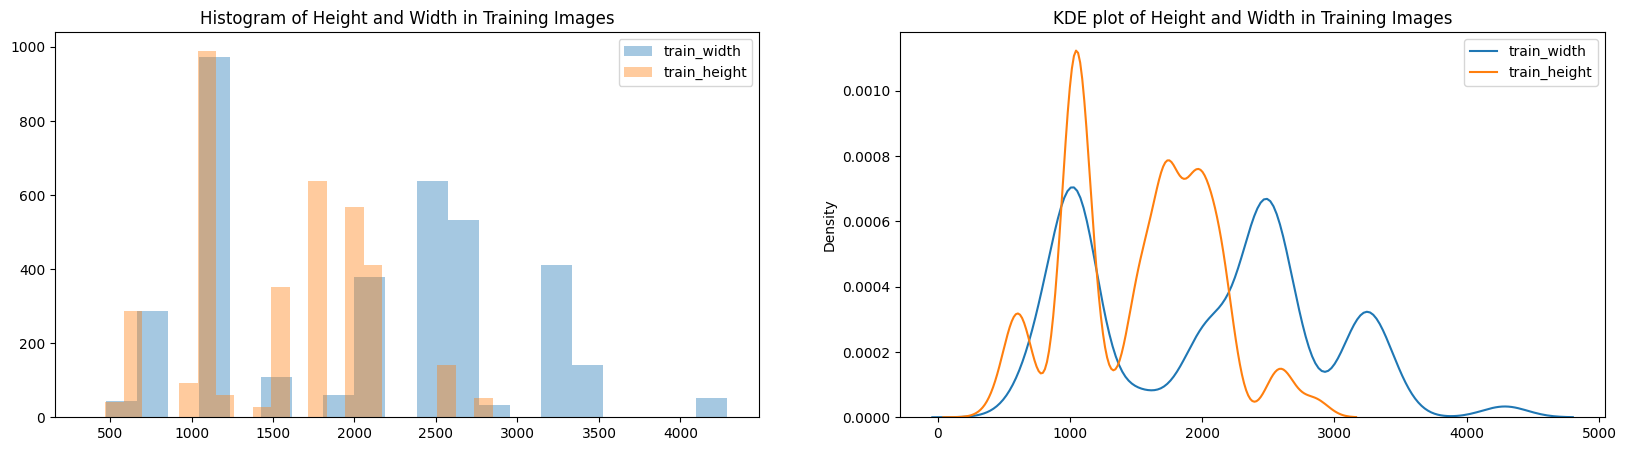

In [13]:
import seaborn as sns
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range, kde = False, label = 'train_width')
sns.distplot(height_range, kde = False, label = 'train_height')
plt.legend()
plt.title("Histogram of Height and Width in Training Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range, label = 'train_width')
sns.kdeplot(height_range, label = 'train_height')
plt.legend()
plt.title('KDE plot of Height and Width in Training Images')
plt.show()

In [14]:
img_width = 512
img_height = 512
no_channels = 3

In [15]:
class ImageProcessing:
    def __init__(self, img_height, img_width, no_channels, tol=7, sigmaX=8):

        ''' Initialzation of variables'''

        self.img_height = img_height
        self.img_width = img_width
        self.no_channels = no_channels
        self.tol = tol
        self.sigmaX = sigmaX

    def cropping_2D(self, img, is_cropping = False):

        '''This function is used for Cropping the extra dark part of the GRAY images'''

        mask = img>self.tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    '''This function is used for Cropping the extra dark part of the RGB images'''
    def cropping_3D(self, img, is_cropping = False):

        

        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>self.tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # if image is too dark we return the image
            return img 
        else:
            img1 = img[:,:,0][np.ix_(mask.any(1),mask.any(0))]  #for channel_1 (R)
            img2 = img[:,:,1][np.ix_(mask.any(1),mask.any(0))]  #for channel_2 (G)
            img3 = img[:,:,2][np.ix_(mask.any(1),mask.any(0))]  #for channel_3 (B)         
            img = np.stack([img1,img2,img3],axis=-1)
        return img

    def Gaussian_blur(self, img, is_gaussianblur = False):

        '''This function is used for adding Gaussian blur (image smoothing technique) which helps in reducing noise in the image.'''

        img = cv2.addWeighted(img,4,cv2.GaussianBlur(img,(0,0),self.sigmaX),-4,128)
        return img

    def draw_circle(self,img, is_drawcircle = True):

        '''This function is used for drawing a circle from the center of the image.'''

        x = int(self.img_width/2)
        y = int(self.img_height/2)
        r = np.amin((x,y))     # finding radius to draw a circle from the center of the image
        circle_img = np.zeros((img_height, img_width), np.uint8)
        cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
        img = cv2.bitwise_and(img, img, mask=circle_img)
        return img

    def image_preprocessing(self, img, is_cropping = True, is_gaussianblur = True):

        """
        This function takes an image -> crops the extra dark part, resizes, draw a circle on it, and finally adds a gaussian blur to the images
        Args : image - (numpy.ndarray) an image which we need to process
           cropping - (boolean) whether to perform cropping of extra part(True by Default) or not(False)
           gaussian_blur - (boolean) whether to apply gaussian blur to an image(True by Default) or not(False)
        Output : (numpy.ndarray) preprocessed image
        """

        if img.ndim == 2:
            img = self.cropping_2D(img, is_cropping)  #calling cropping_2D for a GRAY image
        else:
            img = self.cropping_3D(img, is_cropping)  #calling cropping_3D for a RGB image
        img = cv2.resize(img, (self.img_height, self.img_width))  # resizing the image with specified values
        img = self.draw_circle(img)  #calling draw_circle
        img = self.Gaussian_blur(img, is_gaussianblur) #calling Gaussian_blur
        return img

In [16]:
def images_per_class(class_labels,num, data_x , is_preprocess = False):

    """ 
    This function plots "num" number of images per each class
    Args : class_labels - (Series Object) which contains the class_labels of train or validation sets.
           num - (Integer) sample number of images to be plot per each class
           data_x - (Series Object) which contains the id_code of each point in train or validation sets.
           is_preprocess - (boolean) whether to perform image processing(True) on image or not(False by Default) 
    Output : None - this function doesn't return anything.
    """

    # class_labels num data_x data_y
    labels = list(set(class_labels))
    classes = ['No DR','Mild','Moderate','Severe','Proliferative DR']
    iter=0
    for i in labels:
        j=1
        plt.figure(figsize=(20,5))
        for row in range(len(data_x)):
            if class_labels.iloc[row] == i:
                if is_preprocess == False:plt.subplot(1,num,j)
                else: plt.subplot(1,num*2,j)
                img = cv2.imread('D:/Datasets/aptos2019-blindness-detection/train_images/'+data_x.iloc[row]+'.png')
                img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                plt.imshow(img1)
                plt.axis('off')
                plt.title("Class = {} ({})".format(class_labels.iloc[row],classes[iter]))
                j+=1
                if is_preprocess == True:
                    obj = ImageProcessing(img_width,img_height,no_channels,sigmaX=14)
                    image = obj.image_preprocessing(img)
                    plt.subplot(1,num*2,j)
                    plt.imshow(image)
                    plt.axis('off')
                    plt.title('==> After Image Processing')
                    j+=1
            if is_preprocess == False and j>num: break
            elif is_preprocess == True and j>num*2: break
        iter+=1
        plt.show()

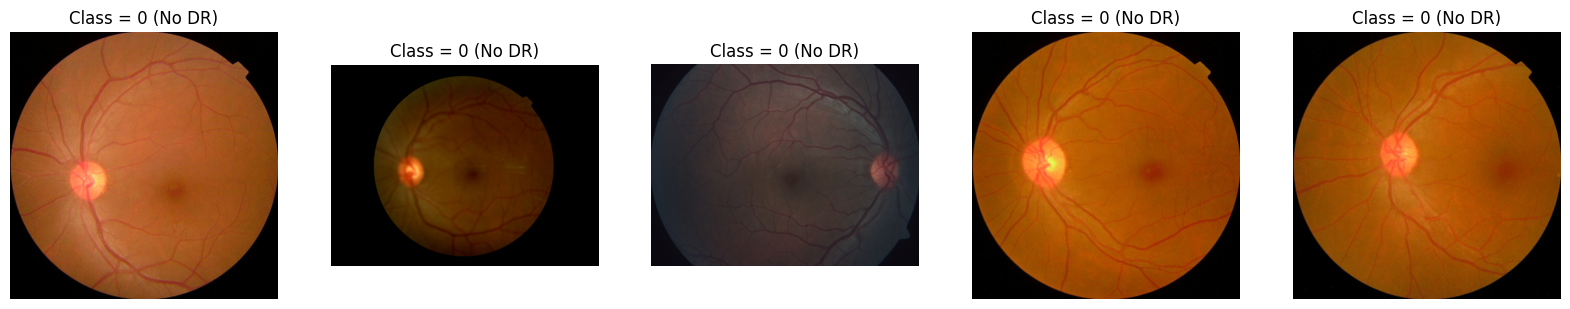

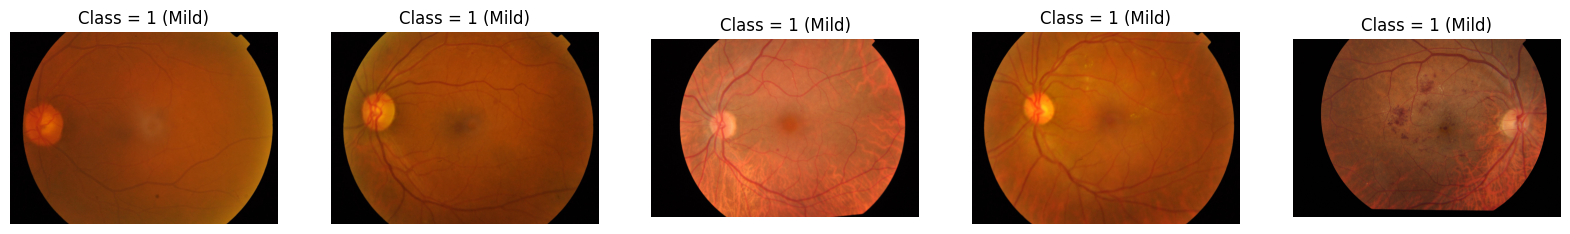

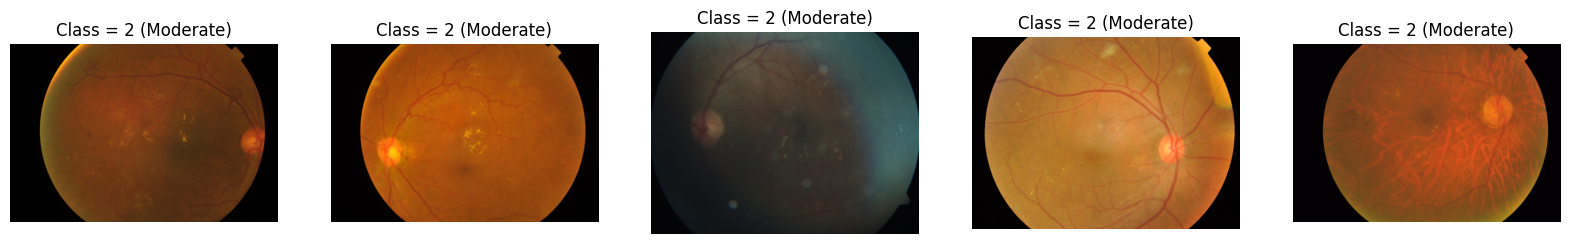

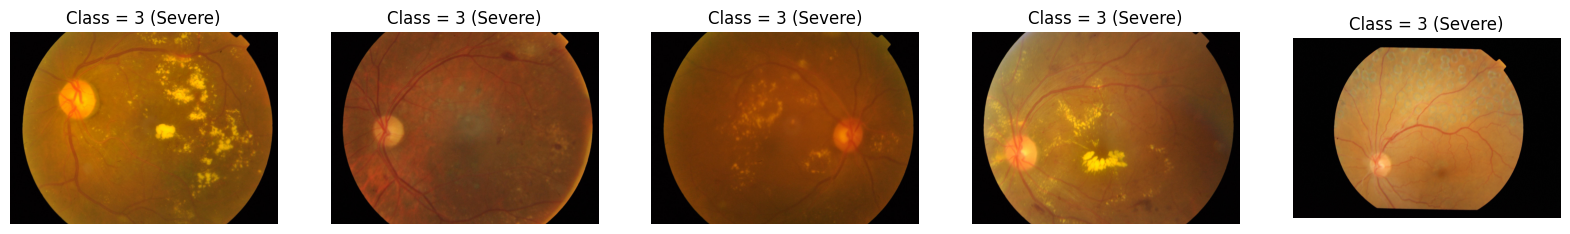

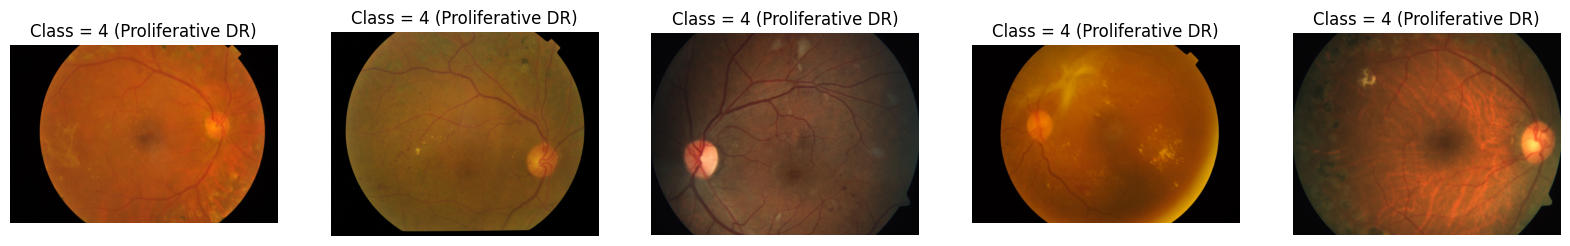

In [17]:
images_per_class(train_labels,5,train_id,False)  #printing 5 random images per each class.

In [18]:
def plotting(img, title,i):
    """
    This function is used for subplots
    Args: img (numpy.ndarray) - image we need to plot
          title(string) - title of the plot
          i (integer) -  column number
    output: None - this function doesn't return anything.
    """
    plt.subplot(1,5,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

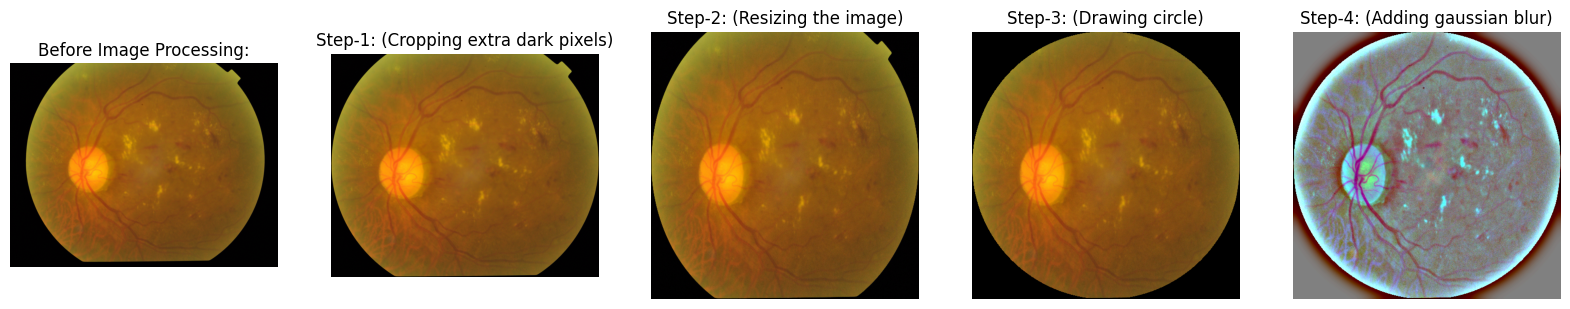

In [19]:
obj1 = ImageProcessing(img_width,img_height, no_channels, sigmaX = 14)
img = 'D:/Datasets/aptos2019-blindness-detection/train_images/03fd50da928d.png'  #random train image
img = cv2.imread(img)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,5))
plotting(img1,'Before Image Processing:',1)
img1 = obj1.cropping_3D(img1)
plotting(img1,'Step-1: (Cropping extra dark pixels)',2)
img1 = cv2.resize(img1, (img_height,img_width))
plotting(img1,'Step-2: (Resizing the image)',3)
img1 = obj1.draw_circle(img1)
plotting(img1,'Step-3: (Drawing circle)',4)
img = obj1.image_preprocessing(img,'True')
plotting(img,'Step-4: (Adding gaussian blur)',5)

In [20]:
img1.shape

(512, 512, 3)

In [21]:
import os

# Initialize your ImageProcessing object and other variables
obj2 = ImageProcessing(img_width, img_height, no_channels, sigmaX=14)
input_folder = 'D:/Datasets/aptos2019-blindness-detection/train_images/'  # Folder containing input images
output_folder = 'D:/Datasets/aptos2019-blindness-detection/Processed_Images/'  # Folder to save processed images

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png"):  # Assuming all images in the folder are PNG files
        # Read and process the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img1 = obj2.cropping_3D(img1)
        img1 = cv2.resize(img1, (img_height, img_width))
        img1 = obj2.draw_circle(img1)
        processed_img = obj2.image_preprocessing(img1, True)
        
        # Save the processed image in the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR))

        # Optionally, you can plot and display the processed image
        # plt.figure(figsize=(20, 5))
        # plotting(processed_img, f'Processed Image: {filename}', 1)
        # plt.show()


In [3]:
import os

# Paths to the folders containing images
folder1_path = 'D:/Datasets/aptos2019-blindness-detection/Processed_Images_Copy'
folder2_path = 'D:/Datasets/aptos2019-blindness-detection/train_images'


folder1_images = os.listdir(folder1_path)


folder2_images = os.listdir(folder2_path)

# Iterate through images in folder1 and check if they are present in folder2
for image_name in folder1_images:
    if image_name not in folder2_images:
        print(f"Image '{image_name}' is not present in folder2.")


In [5]:
import os
import pandas as pd
import shutil

# Paths to your images folder and CSV file
images_folder = 'D:/Datasets/aptos2019-blindness-detection/Processed_Images_Copy'
csv_file = 'D:/Datasets/aptos2019-blindness-detection/train_copy.csv'

# Output folders for each class
output_folders = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Iterate through the DataFrame and copy images to respective class folders
for index, row in df.iterrows():
    image_id = row['id_code']  # Assuming 'image_id' is the column name for image IDs in your CSV
    class_number = row['diagnosis']  # Assuming 'class' is the column name for class numbers in your CSV
    
    # Source path of the image
    source_path = os.path.join(images_folder, f'{image_id}.png')  # Assuming images are in PNG format
    
    # Destination folder based on the class number
    destination_folder = os.path.join(output_folders[class_number], f'{image_id}.png')
    
    # Create the destination folder if it doesn't exist
    os.makedirs(os.path.dirname(destination_folder), exist_ok=True)
    
    # Copy the image to the respective class folder
    shutil.copyfile(source_path, destination_folder)
    
print("Images have been segregated based on class numbers.")


Images have been segregated based on class numbers.


In [40]:
import os
import pandas as pd

# Paths to the folders containing images
folder1_path = 'D:\Projects\Research\DiffusionModel\class_1'
folder2_path = 'D:/Datasets/aptos2019-blindness-detection/train_copy.csv'
folder1_images = os.listdir(folder1_path)

df = pd.read_csv(folder2_path)

In [41]:


for index, row in df.iterrows():
    image_id = row['id_code']
    class_number = row['diagnosis']
    
    if class_number == 2:
        if f'{image_id}.png' not in folder1_images:
            print(f"Image '{image_id}' is not present.")

Image '000c1434d8d7' is not present.
Image '00a8624548a9' is not present.
Image '00b74780d31d' is not present.
Image '00e4ddff966a' is not present.
Image '012a242ac6ff' is not present.
Image '0161338f53cc' is not present.
Image '0180bfa26c0b' is not present.
Image '01c7808d901d' is not present.
Image '01eb826f6467' is not present.
Image '025a169a0bb0' is not present.
Image '026dcd9af143' is not present.
Image '032d7b0b4bf6' is not present.
Image '033f2b43de6d' is not present.
Image '03676c71ed1b' is not present.
Image '03747397839f' is not present.
Image '03fd50da928d' is not present.
Image '03ff7d159f10' is not present.
Image '0415fc68b176' is not present.
Image '041f09eec1e8' is not present.
Image '04a6fc58dabc' is not present.
Image '04d029cfb612' is not present.
Image '0519b934f6b1' is not present.
Image '052d9a3fe55a' is not present.
Image '06024377d573' is not present.
Image '064af6592ba6' is not present.
Image '07083738b75e' is not present.
Image '071435a218ec' is not present.
I